In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:

df= pd.read_csv("C:\\Users\\System21\\Desktop\\diabetes.csv")

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [31]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [32]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
df.replace(0, pd.NA, inplace=True)
df.fillna(df.mean(), inplace=True)

In [35]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.0
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,1.0
std,2.975395,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.0
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,1.0
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,1.0
50%,4.494673,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,1.0
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.0
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.0


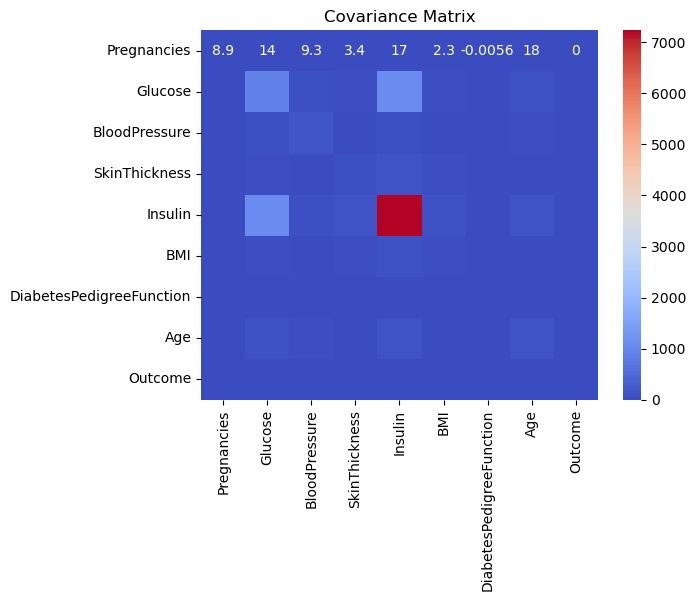

In [36]:
cov_matrix = df.cov()
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm')
plt.title("Covariance Matrix")
plt.show()

In [50]:
X = df.drop(columns=['Age'])
Y = df['Outcome']

In [51]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [52]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [53]:
print("Distribution of Y:\n", Y.value_counts())

Distribution of Y:
 Outcome
1.0    768
Name: count, dtype: int64


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


In [55]:
print("Distribution of Y_train:\n", Y_train.value_counts())

Distribution of Y_train:
 Outcome
1.0    614
Name: count, dtype: int64


In [56]:
basemodel = LogisticRegression()

In [60]:
print("Distribution of X_train:\n", X_train.value_counts())

Distribution of X_train:
 Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI   DiabetesPedigreeFunction  Outcome
1.0          71.0     48.0           18.0           76.000000   20.4  0.323                     1.0        1
5.0          106.0    82.0           30.0           155.548223  39.5  0.286                     1.0        1
             96.0     74.0           18.0           67.000000   33.6  0.997                     1.0        1
             97.0     76.0           27.0           155.548223  35.6  0.378                     1.0        1
             99.0     54.0           28.0           83.000000   34.0  0.499                     1.0        1
                                                                                                          ..
3.0          99.0     54.0           19.0           86.000000   25.6  0.154                     1.0        1
                      62.0           19.0           74.000000   21.8  0.279                     1.0        

In [65]:
# Train the model using the training data
basemodel.fit(X_train, Y_train)

# Predict the target values for both training and testing data
y_train_pred = basemodel.predict(X_train)  # Predictions for the training set
y_test_pred = basemodel.predict(X_test)    # Predictions for the test set


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0